# Introduction to network

## Review

Network theory is the study of graphs as a representation of either symmetric relations or asymmetric relations between discrete objects. Complex systems network theory provides techniques for analyzing structure in a system of interacting agents, represented as a network.

A network, or graph, includes two components: Nodes and Links (or Vertices and Edges). Most complex systems are graph-like. For example friendship networks, scientific collaboration networks, Genetic interaction networks, Protein-Protein interaction networks, transportation networks, electric networks, and so on.

In python, there are several packages are designed for network (or graph) theory. Networkx might be the most famous one, however, it's too slow to analyze large-scale networks. In this tutorial, I choose igraph, which is written in C, as our tool for analyzing networks.

In [2]:
# install igraph package
!apt install libcairo2-dev
!pip install pycairo
!pip install python-igraph

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcairo2-dev is already the newest version (1.15.10-2ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 67 not upgraded.


In [1]:
import igraph as ig
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Create a graph from scratch

#### Undirected Graph

In [2]:
G = ig.Graph(n=5) # Create a graph with 5 vertices, by default, directed=False
G.add_edges(
    [(2, 3), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4)]
) # Add edges to the graph
G.vs['label'] = ['A', 'B', 'C', 'D', 'E'] # set labels for each vertices
print(G)

IGRAPH U--- 5 6 --
+ attr: label (v)
+ edges:
2--3 0--1 0--2 0--3 0--4 1--4


In [3]:
ig.plot(G, 
        bbox=(400, 400),)

AttributeError: Plotting not available; please install pycairo or cairocffi

In [4]:
G.add_vertices(2) # Add another 2 vertices
G.add_edges([
    (5, 6), (5, 0)
])
G.vs[-2:]['label'] = ['F', 'G']

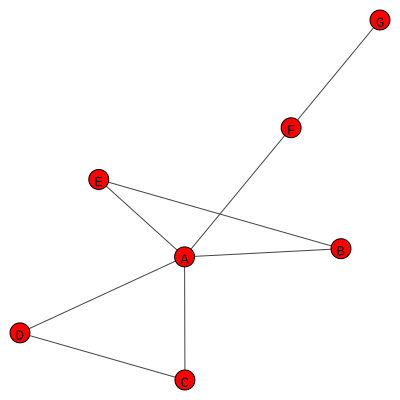

In [ ]:
ig.plot(G, 
        bbox=(400, 400),)

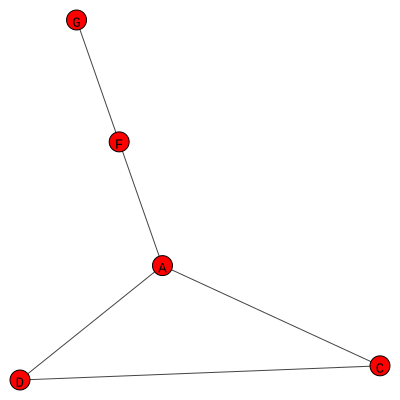

In [ ]:
G.delete_vertices([4, 1]) # remove vertices by id
ig.plot(G, 
        bbox=(400, 400),)

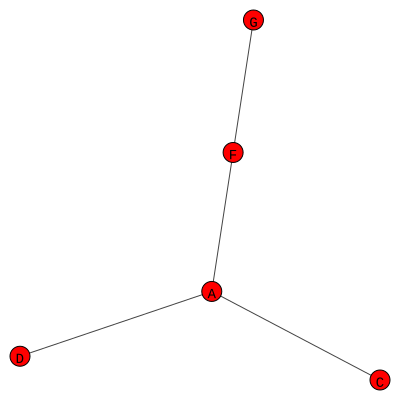

In [ ]:
eid = G.get_eid(G.vs.find(label='D'), G.vs.find(label_eq='C'))
G.delete_edges([eid]) # remove the edge connect C and D
ig.plot(G, 
        bbox=(400, 400),)

#### Directed Graph

In [ ]:
G = ig.Graph(n=5, directed=True) # Create a graph with 5 vertexes
G.add_edges(
    [(2, 3), (1, 0), (0, 3), (0, 4), (1, 4), (4, 1), (0, 2)]
)

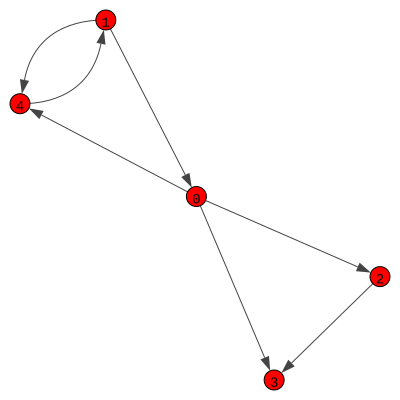

In [ ]:
ig.plot(G, 
        bbox=(400, 400),
        vertex_label=[0, 1, 2, 3, 4])

#### Weighted Graph


In [ ]:
G = ig.Graph(n=5, directed=True) # Create a graph with 5 vertexes
G.add_edges(
    [(2, 3), (1, 0), (0, 3), (0, 4), (1, 4), (4, 1), (0, 2)]
)

G.es['weight'] = np.random.rand(len(G.es))
print(G)

IGRAPH D-W- 5 7 --
+ attr: weight (e)
+ edges:
2->3 1->0 0->3 0->4 1->4 4->1 0->2


In [ ]:
G.is_weighted()

True

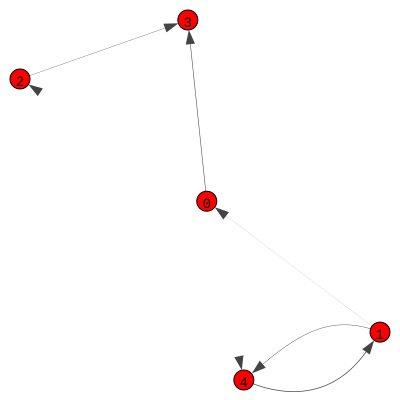

In [ ]:
ig.plot(G, 
        bbox=(400, 400),
        vertex_label=[0, 1, 2, 3, 4],
        edge_width=G.es['weight'])

### Matrix representation of a Graph

#### Adjacency matrix
  An adjacency matrix is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph. If the graph is undirected, the adjacency matrix is symmetric

  The matrix element $A_{ij}$ is one when there is an edge from vertex $v_i$ to vertex $v_j$

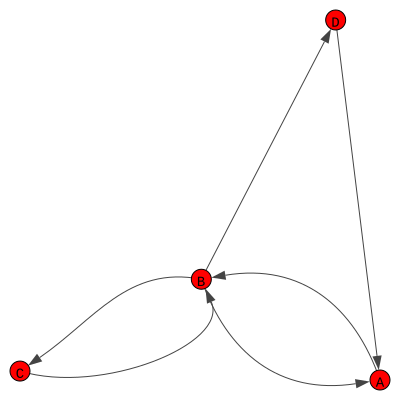

In [ ]:
A = np.array([
    [0, 1, 0, 0],
    [1, 0, 1, 1],
    [0, 1, 0, 0],
    [1, 0, 0, 0]
]) # A is asymmetric, G will be a directed graph
G = ig.Graph.Adjacency(A)
G.vs['name'] = ['A', 'B', 'C', 'D', 'E']
G.vs['label'] = G.vs['name']
ig.plot(G, 
        bbox=(400, 400),)

### Query vertices and edges

In [ ]:
print(G)

IGRAPH D--- 4 6 --
+ edges:
0->1 1->0 1->2 1->3 2->1 3->0


In [ ]:
print(G.vs[0:3]) # select by id

G.vs.find(name='A') # select by vertex's attribute
G.vs.select(name_in=['A', 'B']) # select vertices whose name is A or B
print(G.vs[0].neighbors()) # neighbors of vertex 0
print(G.vs[0].successors())
print(G.vs[0].predecessors())

[igraph.Vertex(<igraph.Graph object at 0x7ff85880b050>, 1, {'name': 'B', 'label': 'B'}), igraph.Vertex(<igraph.Graph object at 0x7ff85880b050>, 1, {'name': 'B', 'label': 'B'}), igraph.Vertex(<igraph.Graph object at 0x7ff85880b050>, 3, {'name': 'D', 'label': 'D'})]
[igraph.Vertex(<igraph.Graph object at 0x7ff85880b050>, 1, {'name': 'B', 'label': 'B'})]
[igraph.Vertex(<igraph.Graph object at 0x7ff85880b050>, 1, {'name': 'B', 'label': 'B'}), igraph.Vertex(<igraph.Graph object at 0x7ff85880b050>, 3, {'name': 'D', 'label': 'D'})]


In [ ]:
G.es # select all the edges
print(G.get_eid(G.vs[0], G.vs[1])) # the edge id connect vertex 0 to vertex 1
print(G.es[0]) # select edge by id
e = G.es[0]
print(e.source, e.target) # source and target of an edge

0
igraph.Edge(<igraph.Graph object at 0x7ff8588d0550>, 0, {})
0 1


### Structural properties of graphs

#### Degree
The vertex degree is the number of edges adjacent to the node

In [ ]:
print(G.degree())
print(G.vs[2].degree()) # vertex 2's degree
# for directed graph
print(G.indegree())
print(G.outdegree())

[3, 5, 2, 2]
2
[2, 2, 1, 1]
[1, 3, 1, 1]


#### shortest path

In [ ]:
print(G.shortest_paths(source=G.vs[0], target=G.vs[2])) # get the shortest distance from 0 to 2
print(G.get_shortest_paths(G.vs[0],to=G.vs[2])) # get one of the shortest path from 0 to 2
print(G.get_all_shortest_paths(G.vs[0], G.vs[2])) # get all of the shortest path from 0 to 2
print(G.average_path_length()) # average of all of the shortest path

[[2]]
[[0, 1, 2]]
[[0, 1, 2]]
1.5833333333333333


#### diameter
The diameter of a graph is the length of the longest shortest path

In [ ]:
print(G.diameter())
print(G.get_diameter())

3
[3, 0, 1, 2]


#### betweenness
The betweenness centrality of a node $v$ is given by the expression:
$$g(v)=\sum _{{s\neq v\neq t}}{\frac  {\sigma _{{st}}(v)}{\sigma _{{st}}}}$$

where $\sigma_{st}$ is the total number of shortest paths from node $s$ to node $t$ and $\sigma_{st}(v)$ is the number of those paths that pass through $v$ (not where $v$ is an end point).

In [ ]:
print(G.vs.betweenness())
print(G.es.edge_betweenness())

[2.0, 5.0, 0.0, 0.0]
[5.0, 2.0, 3.0, 3.0, 3.0, 3.0]


#### Clustering coefficient (transitivity)
the transitivity of one vertex is given by:
$$
C = \frac{\text{Number of links among the k neighbors}}{k(k-1)/2}
$$

In [ ]:
G = ig.Graph(n=5) # Create a graph with 5 vertices, by default, directed=False
G.add_edges(
    [(2, 3), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4)]
)

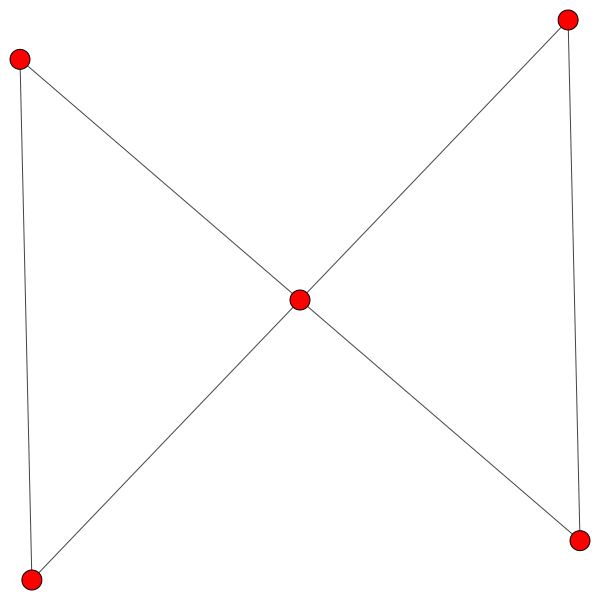

In [ ]:
ig.plot(G)

In [ ]:
print(G.transitivity_local_undirected()) # transitivity for each nodes
print(G.transitivity_undirected()) # global transitivity, the ratio of the triangles and connected triplets in the graph.
print(G.transitivity_avglocal_undirected())

[0.3333333333333333, 1.0, 1.0, 1.0, 1.0]
0.6
0.8666666666666666


### Generate Graph from build-in Generators

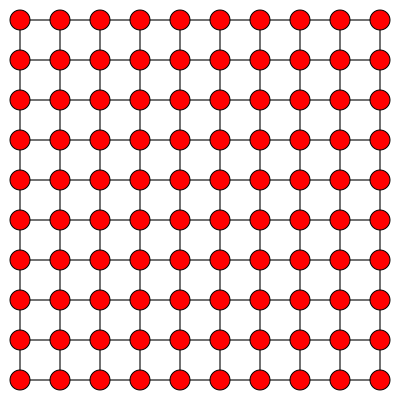

In [ ]:
# Lattice
G = ig.Graph.Lattice([10, 10]) # Lattice size
layout = ig.Graph.layout_grid(G)
ig.plot(G, bbox=(400, 400), layout=layout)

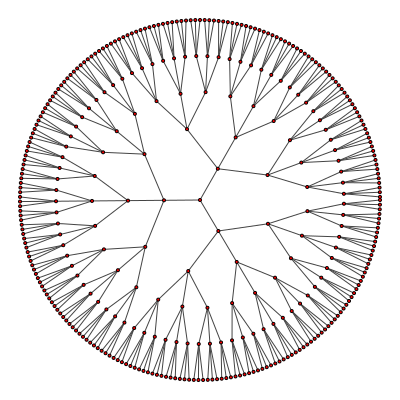

In [ ]:
G = ig.Graph.Tree(n=364, children=3) # number of nodes, number of children per node
layout = ig.Graph.layout_reingold_tilford_circular(G)
ig.plot(G, vertex_size=3, bbox=(400, 400), layout=layout)

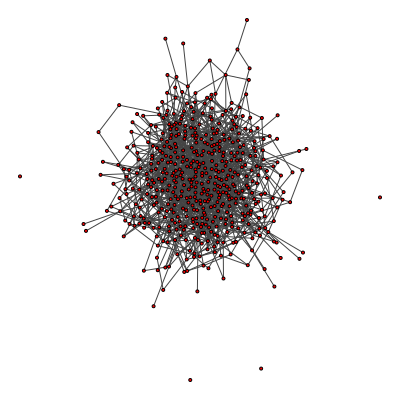

In [ ]:
G = ig.Graph.Erdos_Renyi(500, p = 0.01) 
# number of nodes, p: probability or m: number of links, 
layout = ig.Graph.layout_lgl(G)
ig.plot(G, bbox=(400, 400), vertex_size=3)

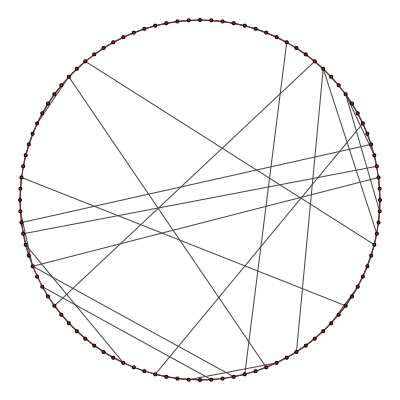

In [ ]:
G = ig.Graph.Watts_Strogatz(1, 100, 2, 0.05) 
# dimension of the starting lattice, 
# number of nodes,
# the neighborhood within which the nodes of the lattice will be connected.
# rewiring probability
layout = ig.Graph.layout_circle(G)
ig.plot(G, bbox=(400, 400), vertex_size=3, layout=layout)

In [14]:
G = ig.Graph.Watts_Strogatz(1, 1000, 2, 0.1)
print("average length is ", G.average_path_length())
print("Clustering coefficient is", G.transitivity_undirected()) # for random network, C = p

average length is  7.030536536536537
Clustering coefficient is 0.25350118017309203


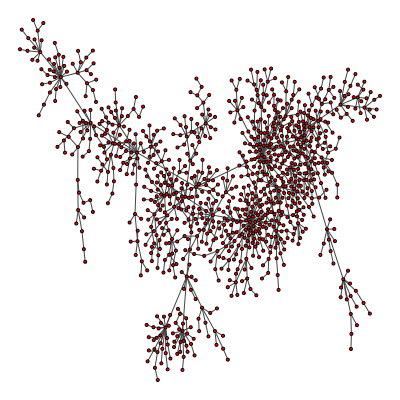

In [ ]:
G = ig.Graph.Barabasi(1000, 1, power=1.2)
# number of nodes
# the number of edges to add in each time step
# The power of the preferential attachment
layout = ig.Graph.layout_lgl(G)
ig.plot(G, bbox=(400, 400), vertex_size=3, layout=layout)

#### Degree distribution of Random graph and scale-free graph

##### Random Graph:

In [ ]:
G_er = ig.Graph.Erdos_Renyi(1000, p = 0.01,)

In [ ]:
def poisson_distribution(k, Lambda):
    from scipy.special import factorial
    return Lambda ** k * np.exp(- Lambda) / factorial(k)

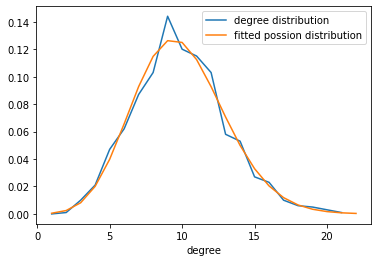

In [ ]:
max_degree = G_er.vs.maxdegree()
x = np.arange(1, max_degree+1, 1)
y = poisson_distribution(x, np.mean(G_er.vs.degree()))
hist, bin = np.histogram(G_er.vs.degree(), bins=np.arange(0.5, max_degree+0.5, 1), density=True)
bin_center = (bin[1:] + bin[:-1]) / 2

plt.plot(bin_center, hist, label='degree distribution')
plt.plot(x, y, label='fitted possion distribution')
plt.legend()
plt.xlabel("degree")
plt.show()

scale free network

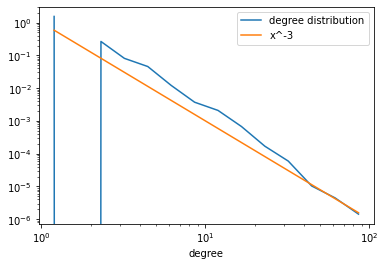

In [ ]:
G_ba = ig.Graph.Barabasi(n=100000, m=1, power=1)
max_degree =  G_ba.maxdegree()
hist, bin = np.histogram(G_ba.vs.degree(), bins=np.arange(0.5, max_degree+0.5, 1), density=True)
hist, bin = np.histogram(G_ba.vs.degree(), bins=np.logspace(0, 2, 15), density=True)

bin_center = (bin[1:] + bin[:-1]) / 2
plt.plot(bin_center, hist, label='degree distribution')
plt.plot(bin_center, bin_center ** (-3), label='x^-3')
plt.xlabel('degree')
plt.legend()
plt.xscale('log')
plt.yscale('log')

### A real world network: 

In [ ]:
import pandas as pd
names = ('airline,airline_id,'
         'source,source_id,'
         'dest,dest_id,'
         'codeshare,stops,equipment').split(',')
routes = pd.read_csv(
    'https://github.com/ipython-books/'
    'cookbook-2nd-data/blob/master/'
    'routes.dat?raw=true',
    names=names,
    header=None)
routes

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [ ]:
G_airtraffic = ig.Graph.DataFrame(routes.loc[:, ['source', 'dest']])

In [ ]:
G_airtraffic.summary()

'IGRAPH DN-- 3425 67663 -- \n+ attr: name (v)'

[-1.63053766  1.02610088]


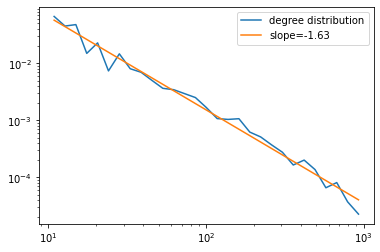

In [ ]:
max_degree = G_airtraffic.maxdegree()
# hist, bin = np.histogram(G_airtraffic.vs.degree(), bins=np.arange(0.5, max_degree+0.5, 1), density=True)
hist, bin = np.histogram(G_airtraffic.vs.degree(), bins=np.logspace(1, 3, 30), density=True)

bin_center = (bin[1:] + bin[:-1]) / 2
par = np.polyfit(np.log(bin_center), np.log(hist), 1)
print(par)
plt.plot(bin_center, hist, label='degree distribution')
plt.plot(bin_center, np.exp(par[1])* bin_center**par[0], label=f'slope={par[0]:.2f}')
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [ ]:
# find node id of an airport:
G_airtraffic.vs.find(name='TLV')

igraph.Vertex(<igraph.Graph object at 0x7ff8588d0c50>, 2839, {'name': 'TLV'})

In [ ]:
G_airtraffic.transitivity_local_undirected()[2839]

0.4037650113599481

In [ ]:
G_airtraffic.vs.find(name='TLV').betweenness()

38251.46416052108

In [ ]:
G_airtraffic.vs.find(name='TLV').degree()

271

In [ ]:
# shortest path from Tel Aviv to Hawaii
G_airtraffic.get_shortest_paths(
    G_airtraffic.vs.find(name='TLV'),
    to=G_airtraffic.vs.find(name='HNL'),
)

[[2839, 835, 1111]]

In [ ]:
# airport with maximum degree
G_airtraffic.vs.select(_degree=G_airtraffic.maxdegree())['name']

['ATL']

In [ ]:
# airport with maximum betweenness
G_airtraffic.vs.select(_betweenness=max(G_airtraffic.betweenness()))['name']

['LAX']

#### Target Attack

In [ ]:
source = 'TLV'
target = 'HNL'

def remove_node(G, name):
    """
    delete a node with name = name
    """
    G.delete_vertices(
        G.vs.find(name=name)
    )


G_air_copy = G_airtraffic.copy()

betweenness = np.array(G_air_copy.betweenness())
node_list = np.argsort(betweenness)[::-1]
sorted_name = G_air_copy.vs[list(node_list)]['name']
num_removed_v = []
shortest_path = []
for i in range(len(node_list)):
    if sorted_name[i] == source or sorted_name[i] == target:
        continue
    remove_node(G_air_copy, sorted_name[i])

    sp = G_air_copy.shortest_paths(
        G_air_copy.vs.find(name=source),
        G_air_copy.vs.find(name=target),)
    sp = sp[0]

    num_removed_v.append(i+1)
    shortest_path.append(sp)
    if sp == np.inf:
        break

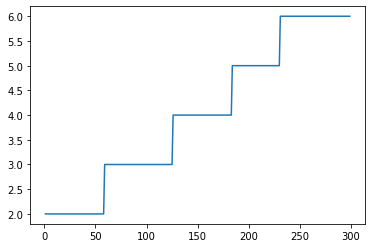

In [ ]:
plt.plot(num_removed_v, shortest_path, label="remove high betweenness vertex first")

## Exercises

1. Summarize what you have learned about network.

2. Reproduce the figure on page 25.

The real world network has much smaller distance than regular network and much larger clustering coefficient than random network. Watts-Strogatz Model is a network model between regular and random network. Study how the average distance and the average clustering coefficient changes with the increasing of rewiring parameter p.

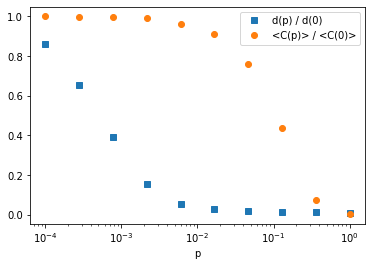

3. Write a function to generate BA model when m=1 and power=1, visualize the degree distribtuion and fit the degree distribution with a power law to get the exponent.

In [41]:
def BA_generator(n):
    """
    n: number of vertices
    
    return an igraph Graph object
    """
    raise NotImplementedError


G = GA_generator(1000)


4. Choose a destination from Tel Aviv (TLV) that you can only reach with connecting flights. 
* Determine the shortest path length. 

* Targetly remove airports from the network with highest degree (network hubs) and plot shortest path vs number of removed nodes. 

* Plot in the same graph the shortest path if network nodes are removed randomly. Compare your result with the findings obtained for betweenness.